# MTCI Product

<div>
    <img style='width: 220px;height: 100px;float: left;' src="../../Supplementary_data/EODC-Logo-Final.png" height='100px' width='220px'/>
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/BMNT_DE_Logo_dreizeilig_srgb.svg" height='100px' width='200px'/> 
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/bmlv.svg" height='100px' width='200px'/>
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/LOGO_TUW_GEO.png" height='100px' width='200px'/>
    <img style='width: 100px;height: 100px;float: left;' src="../../Supplementary_data/Boku-wien.svg" height='100px' width='100px'/>
    <img style='width: 150px;height: 100px;float: right;' src="../../Supplementary_data/ADC_Logo_final_transparent.png" height='100px' width='150px'/>
</div>

This notebook shows the MTCI product created by BOKU. This product contains the True Color Image obtained from Sentinel-2A and 2B data, temporally aggregated over monthly periods. If two or more valid pixels are found in the monthly compositing period, only the most recent pixel is taken. The product is resampled to the Equi7 Grid, covers an area of 100 km x 100 km with a pixel sampling of 10 m.  

The product name in the ACube is `MTCI_Sentinel_2`. It is composed of three measurements `B02`, `B03`, `B04`.

Relevant links:
* https://acube.eodc.eu/xwiki/bin/view/2.%20Terminology/3.3.%20Datasets/3.4.2.%20Sentinel-2%20data/3.4.2.3.%20Products/
* https://acube.eodc.eu/xwiki/bin/view/2.%20Terminology/3.3.%20Datasets/3.4.2.%20Sentinel-2%20data/

## Exploring the product

The code below initialises the datacube and lists some metadata of the product, measurements and datasets. We can see that this product has two measurements and a spatial resolution of 10 m. We also list the metadata fields that are available.

In [1]:
import datacube
import xarray
from pprint import pprint
%matplotlib inline
dc = datacube.Datacube(app='sample_mtci', env='acube')
product = 'MTCI_Sentinel_2'

In [2]:
prodlist=dc.list_products().dropna(axis=1)
prodlist[prodlist['name'] == product]

,name,description,platform,format,instrument,product_type,crs,resolution,spatial_dimensions
id,,,,,,,,,
25,MTCI_Sentinel_2,Monthly composite True Color Image,Sentinel-2,GeoTIFF,MSI,BOKU_MTCI_S2,"PROJCS[""unnamed"",GEOGCS[""WGS 84"",DATUM[""WGS_19...","(-10, 10)","(y, x)"


In [3]:
measlist = dc.list_measurements()
measlist.loc[measlist.index.get_level_values(0) == product]

name  dtype units  nodata  \
product         measurement                             
MTCI_Sentinel_2 B02          B02  uint8    DN       0   
                B03          B03  uint8    DN       0   
                B04          B04  uint8    DN       0   

                                                      aliases  
product         measurement                                    
MTCI_Sentinel_2 B02          [band_2, band_02, Band2, Band_2]  
                B03          [band_2, band_03, Band3, Band_3]  
                B04          [band_3, band_04, Band4, Band_4]

In [4]:
query = {
    'lat': (48.15, 48.35),
    'lon': (16.3, 16.5),
    'time': ('2019-06-06', '2019-06-06')
}

In [5]:
for dataset in dc.find_datasets_lazy(product=product, **query):
    print(100*'*')
    print('METADATA FIELDS: ', sorted(list(dataset.metadata_doc.keys())))
    print(100*'*')
    print('METADATA')
    pprint(dataset.metadata_doc)
    print(100*'*')

****************************************************************************************************
METADATA FIELDS:  ['equi7_system', 'equi7_tile', 'extent', 'format', 'grid_spatial', 'id', 'image', 'instrument', 'lineage', 'name', 'platform', 'product_type']
****************************************************************************************************
METADATA
{'equi7_system': 'EU010M',
 'equi7_tile': 'E052N016T1',
 'extent': {'center_dt': '2019-06-01T00:00:00',
            'coord': {'ll': {'lat': 47.97836637131796,
                             'lon': 15.455732336236064},
                      'lr': {'lat': 48.0747977797218, 'lon': 16.78723851350588},
                      'ul': {'lat': 48.87019287824474,
                             'lon': 15.300385421628878},
                      'ur': {'lat': 48.96874953569572,
                             'lon': 16.65563642003795}},
            'from_dt': '2019-06-01T00:00:00',
            'to_dt': '2019-06-30T00:00:00'},
 'format': {'nam

## Querying and displaying the data

In [6]:
data = dc.load(product=product, 
               output_crs='EPSG:32633', 
               resolution=(-10,10),
                **query)
data

<xarray.Dataset>
Dimensions:      (time: 1, x: 1526, y: 2250)
Coordinates:
  * time         (time) datetime64[ns] 2019-06-15T12:00:00
  * y            (y) float64 5.356e+06 5.356e+06 ... 5.334e+06 5.334e+06
  * x            (x) float64 5.963e+05 5.963e+05 ... 6.116e+05 6.116e+05
    spatial_ref  int32 32633
Data variables:
    B02          (time, y, x) uint8 19 14 21 25 17 20 18 21 ... 0 0 0 0 0 0 126
    B03          (time, y, x) uint8 42 25 50 54 32 42 40 42 ... 0 0 0 0 0 0 119
    B04          (time, y, x) uint8 23 12 27 32 13 29 26 28 ... 0 0 0 0 0 0 88
Attributes:
    crs:           EPSG:32633
    grid_mapping:  spatial_ref

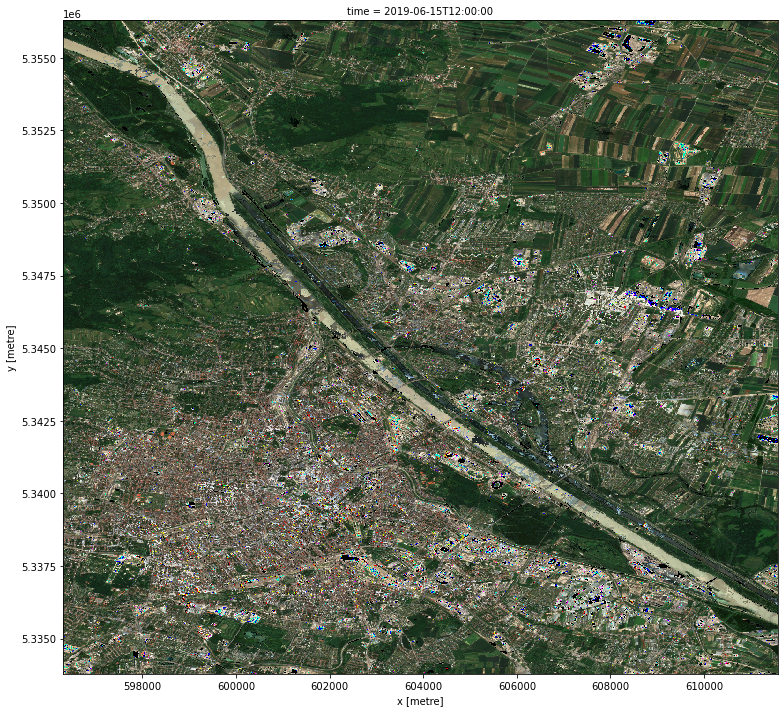

In [7]:
data_plot = data.to_array(dim='color')
data_plot.plot.imshow(
    x='x', 
    y='y',
    col='time',
    size=10,
)